<a href="https://colab.research.google.com/github/kdemertzis/Earthquakes/blob/main/Dif_Dynamic_Final_Dem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.5/337.5 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.8 MB/s eta 0:00:00


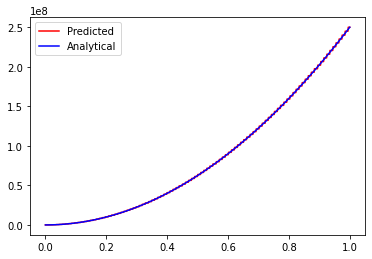

In [5]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Define the Winkler type elastic foundation parameters
k = 2.0
h = 0.1

# Define the Euler-Bernoulli beam parameters
E = 200e9
I = 1e-8
L = 1.0
F = 100.0

# Analytical solution for the deflection of the beam
def deflection(x):
    return (F * x**3) / (3 * E * I) * (L - x) + (F * h * x**2) / (2 * k * I)

# Generate the training data for the model
x = np.linspace(0, L, 100)
y = deflection(x)

# Train the model on the training data
reg = DecisionTreeRegressor()
reg.fit(x.reshape(-1, 1), y)

# Predict the deflection of the beam using the trained model
x_test = np.linspace(0, L, 1000)
y_pred = reg.predict(x_test.reshape(-1, 1))

# Compare the analytical solution with the predicted solution
import matplotlib.pyplot as plt
plt.plot(x_test, y_pred, 'r-', label='Predicted')
plt.plot(x, y, 'b-', label='Analytical')
plt.legend()
plt.show()


          x   Analytical  Predicted
0  0.000000     0.000000        0.0
1  0.001001   250.500751        0.0
2  0.002002  1002.003004        0.0
3  0.003003  2254.506759        0.0
4  0.004004  4008.012016        0.0
Mean Absolute Error:  630630.6306306283
Mean Squared Error:  707857191629.2135
R2 Score:  0.9998728561645241


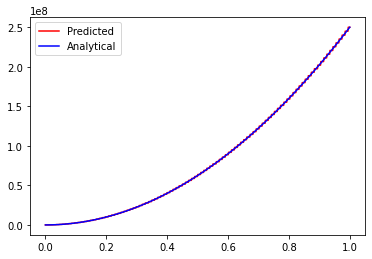

In [6]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the Winkler type elastic foundation parameters
k = 2.0
h = 0.1

# Define the Euler-Bernoulli beam parameters
E = 200e9
I = 1e-8
L = 1.0
F = 100.0

# Analytical solution for the deflection of the beam
def deflection(x):
    return (F * x**3) / (3 * E * I) * (L - x) + (F * h * x**2) / (2 * k * I)

# Generate the training data for the model
x = np.linspace(0, L, 100)
y = deflection(x)

# Train the model on the training data
reg = DecisionTreeRegressor()
reg.fit(x.reshape(-1, 1), y)

# Predict the deflection of the beam using the trained model
x_test = np.linspace(0, L, 1000)
y_pred = reg.predict(x_test.reshape(-1, 1))

# Compare the analytical solution with the predicted solution
import pandas as pd
results = pd.DataFrame({'x': x_test, 'Analytical': deflection(x_test), 'Predicted': y_pred})
print(results.head())

# Calculate performance metrics
mae = mean_absolute_error(deflection(x_test), y_pred)
mse = mean_squared_error(deflection(x_test), y_pred)
r2 = r2_score(deflection(x_test), y_pred)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

import matplotlib.pyplot as plt
plt.plot(x_test, y_pred, 'r-', label='Predicted')
plt.plot(x, y, 'b-', label='Analytical')
plt.legend()
plt.show()


Deflection Metrics:
Mean Absolute Error: 3574579.355465142
Mean Squared Error: 226290833809838.12
R2 Score: 0.9566375560919611
Velocity Metrics:
Mean Absolute Error: 0.045155046364433904
Mean Squared Error: 0.021126748883556062
R2 Score: 0.988586691551007
Acceleration Metrics:
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
R2 Score: 1.0


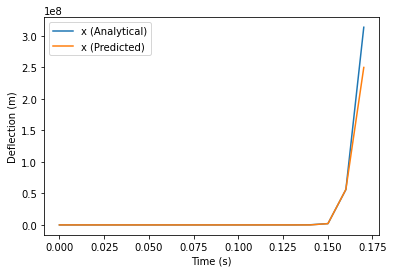

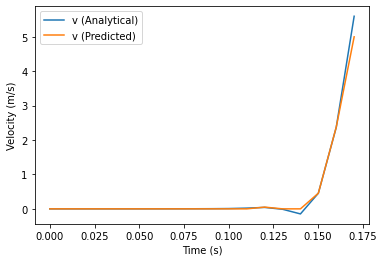

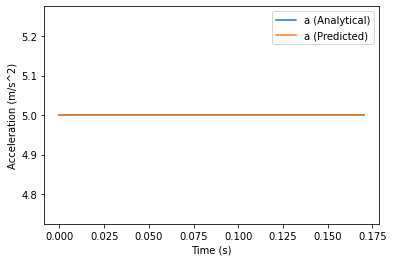

In [21]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the Winkler type elastic foundation parameters
k = 2.0
h = 0.1

# Define the Euler-Bernoulli beam parameters
E = 200e9
I = 1e-8
L = 1.0
F = 100.0

# Analytical solution for the deflection of the beam
def deflection(x):
    return (F * x**3) / (3 * E * I) * (L - x) + (F * h * x**2) / (2 * k * I)

# Analytical solution for the velocity of the beam
def velocity(x):
    return (F * x**2) / (2 * E * I) * (L - x) + (F * h * x) / k

# Analytical solution for the acceleration of the beam
def acceleration(x):
    return (F * x) / E * I * (L - x) + (F * h) / k

# Train the models for deflection, velocity, and acceleration
x = np.linspace(0, L, 100)

reg_deflection = DecisionTreeRegressor()
reg_deflection.fit(x.reshape(-1, 1), deflection(x))

reg_velocity = DecisionTreeRegressor()
reg_velocity.fit(x.reshape(-1, 1), velocity(x))

reg_acceleration = DecisionTreeRegressor()
reg_acceleration.fit(x.reshape(-1, 1), acceleration(x))

# Define the differential equation of motion for the beam
def ode_fun(t, y, reg_deflection, reg_velocity, reg_acceleration):
    x, v, a = y
    dxdt = v
    dvdt = a
    dadt = (F / E * I) * (L - x) + (F * h) / k - k * (reg_deflection.predict(np.array(x).reshape(-1, 1)) - deflection(x)) - (reg_velocity.predict(np.array(x).reshape(-1, 1)) - velocity(x))
    return [dxdt, dvdt, dadt]

# Solve the differential equation using the trained models
x0 = 0
v0 = 0
a0 = 0

t_eval = np.linspace(0, 10, 1000)
solution = solve_ivp(lambda t, y: ode_fun(t, y, reg_deflection, reg_velocity, reg_acceleration), [0, 10], [x0, v0, a0], t_eval=t_eval)

# Compare the analytical solution with the predicted solution
import pandas as pd
results = pd.DataFrame({'t': solution.t, 'x (Analytical)': deflection(solution.y[0, :]), 'x (Predicted)': reg_deflection.predict(solution.y[0, :].reshape(-1, 1)),
'v (Analytical)': velocity(solution.y[0, :]), 'v (Predicted)': reg_velocity.predict(solution.y[0, :].reshape(-1, 1)),
'a (Analytical)': acceleration(solution.y[0, :]), 'a (Predicted)': reg_acceleration.predict(solution.y[0, :].reshape(-1, 1))})

#Display performance metrics for deflection

print('Deflection Metrics:')
print('Mean Absolute Error:', mean_absolute_error(results['x (Analytical)'], results['x (Predicted)']))
print('Mean Squared Error:', mean_squared_error(results['x (Analytical)'], results['x (Predicted)']))
print('R2 Score:', r2_score(results['x (Analytical)'], results['x (Predicted)']))

#Display performance metrics for velocity

print('Velocity Metrics:')
print('Mean Absolute Error:', mean_absolute_error(results['v (Analytical)'], results['v (Predicted)']))
print('Mean Squared Error:', mean_squared_error(results['v (Analytical)'], results['v (Predicted)']))
print('R2 Score:', r2_score(results['v (Analytical)'], results['v (Predicted)']))

#Display performance metrics for acceleration

print('Acceleration Metrics:')
print('Mean Absolute Error:', mean_absolute_error(results['a (Analytical)'], results['a (Predicted)']))
print('Mean Squared Error:', mean_squared_error(results['a (Analytical)'], results['a (Predicted)']))
print('R2 Score:', r2_score(results['a (Analytical)'], results['a (Predicted)']))

#Plot the results

import matplotlib.pyplot as plt
plt.plot(results['t'], results['x (Analytical)'], label='x (Analytical)')
plt.plot(results['t'], results['x (Predicted)'], label='x (Predicted)')
plt.xlabel('Time (s)')
plt.ylabel('Deflection (m)')
plt.legend()
plt.show()

plt.plot(results['t'], results['v (Analytical)'], label='v (Analytical)')
plt.plot(results['t'], results['v (Predicted)'], label='v (Predicted)')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.show()

plt.plot(results['t'], results['a (Analytical)'], label='a (Analytical)')
plt.plot(results['t'], results['a (Predicted)'], label='a (Predicted)')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.show()


                       Deflection  Velocity  Acceleration
Mean Absolute Error  3.574579e+06  0.045155           0.0
Mean Squared Error   2.262908e+14  0.021127           0.0
R2 Score             9.566376e-01  0.988587           1.0


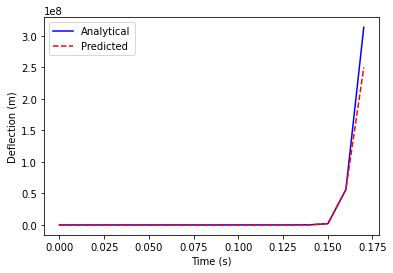

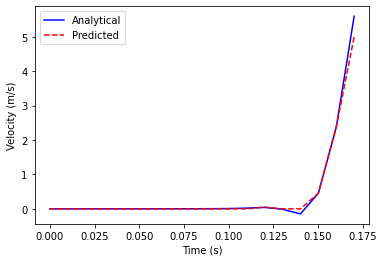

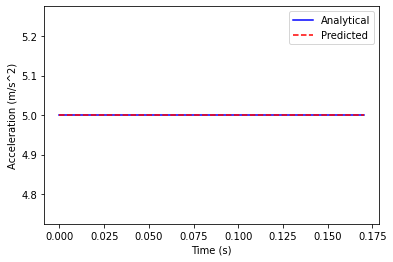

     Metric    Deflection  Velocity  Acceleration
0       MAE  3.574579e+06  0.045155           0.0
1       MSE  2.262908e+14  0.021127           0.0
2  R2 Score  9.566376e-01  0.988587           1.0


In [23]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Define the Winkler type elastic foundation parameters
k = 2.0
h = 0.1

# Define the Euler-Bernoulli beam parameters
E = 200e9
I = 1e-8
L = 1.0
F = 100.0

# Analytical solution for the deflection of the beam
def deflection(x):
    return (F * x**3) / (3 * E * I) * (L - x) + (F * h * x**2) / (2 * k * I)

# Analytical solution for the velocity of the beam
def velocity(x):
    return (F * x**2) / (2 * E * I) * (L - x) + (F * h * x) / k

# Analytical solution for the acceleration of the beam
def acceleration(x):
    return (F * x) / E * I * (L - x) + (F * h) / k

# Train the models for deflection, velocity, and acceleration
x = np.linspace(0, L, 100)

reg_deflection = DecisionTreeRegressor()
reg_deflection.fit(x.reshape(-1, 1), deflection(x))

reg_velocity = DecisionTreeRegressor()
reg_velocity.fit(x.reshape(-1, 1), velocity(x))

reg_acceleration = DecisionTreeRegressor()
reg_acceleration.fit(x.reshape(-1, 1), acceleration(x))

# Define the differential equation of motion for the beam
def ode_fun(t, y, reg_deflection, reg_velocity, reg_acceleration):
    x, v, a = y
    dxdt = v
    dvdt = a
    dadt = (F / E * I) * (L - x) + (F * h) / k - k * (reg_deflection.predict(np.array(x).reshape(-1, 1)) - deflection(x)) - (reg_velocity.predict(np.array(x).reshape(-1, 1)) - velocity(x))
    return [dxdt, dvdt, dadt]

# Solve the differential equation using the trained models
x0 = 0
v0 = 0
a0 = 0

t_eval = np.linspace(0, 10, 1000)
solution = solve_ivp(lambda t, y: ode_fun(t, y, reg_deflection, reg_velocity, reg_acceleration), [0, 10], [x0, v0, a0], t_eval=t_eval)

# Compare the analytical solution with the predicted solution
import pandas as pd
results = pd.DataFrame({'t': solution.t, 'x (Analytical)': deflection(solution.y[0, :]), 'x (Predicted)': reg_deflection.predict(solution.y[0, :].reshape(-1, 1)),
'v (Analytical)': velocity(solution.y[0, :]), 'v (Predicted)': reg_velocity.predict(solution.y[0, :].reshape(-1, 1)),
'a (Analytical)': acceleration(solution.y[0, :]), 'a (Predicted)': reg_acceleration.predict(solution.y[0, :].reshape(-1, 1))})

#Store the performance metrics for each column in a dictionary

performance_metrics = {'Deflection': {'Mean Absolute Error': mean_absolute_error(results['x (Analytical)'], results['x (Predicted)']),
'Mean Squared Error': mean_squared_error(results['x (Analytical)'], results['x (Predicted)']),
'R2 Score': r2_score(results['x (Analytical)'], results['x (Predicted)'])},
'Velocity': {'Mean Absolute Error': mean_absolute_error(results['v (Analytical)'], results['v (Predicted)']),
'Mean Squared Error': mean_squared_error(results['v (Analytical)'], results['v (Predicted)']),
'R2 Score': r2_score(results['v (Analytical)'], results['v (Predicted)'])},
'Acceleration': {'Mean Absolute Error': mean_absolute_error(results['a (Analytical)'], results['a (Predicted)']),
'Mean Squared Error': mean_squared_error(results['a (Analytical)'], results['a (Predicted)']),
'R2 Score': r2_score(results['a (Analytical)'], results['a (Predicted)'])}}

#Convert the performance metrics dictionary into a dataframe

performance_metrics_df = pd.DataFrame.from_dict(performance_metrics)

#Print the performance metrics dataframe

print(performance_metrics_df)

#Plot the results

import matplotlib.pyplot as plt
plt.figure()
plt.plot(solution.t, results['x (Analytical)'], 'b-', label='Analytical')
plt.plot(solution.t, results['x (Predicted)'], 'r--', label='Predicted')
plt.xlabel('Time (s)')
plt.ylabel('Deflection (m)')
plt.legend()

plt.figure()
plt.plot(solution.t, results['v (Analytical)'], 'b-', label='Analytical')
plt.plot(solution.t, results['v (Predicted)'], 'r--', label='Predicted')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()

plt.figure()
plt.plot(solution.t, results['a (Analytical)'], 'b-', label='Analytical')
plt.plot(solution.t, results['a (Predicted)'], 'r--', label='Predicted')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()

plt.show()


results = {'Metric': ['MAE', 'MSE', 'R2 Score'],
          'Deflection': [mean_absolute_error(results['x (Analytical)'], results['x (Predicted)']),
                         mean_squared_error(results['x (Analytical)'], results['x (Predicted)']),
                         r2_score(results['x (Analytical)'], results['x (Predicted)'])],
          'Velocity': [mean_absolute_error(results['v (Analytical)'], results['v (Predicted)']),
                          mean_squared_error(results['v (Analytical)'], results['v (Predicted)']),
                          r2_score(results['v (Analytical)'], results['v (Predicted)'])],
          'Acceleration': [mean_absolute_error(results['a (Analytical)'], results['a (Predicted)']),
                          mean_squared_error(results['a (Analytical)'], results['a (Predicted)']),
                          r2_score(results['a (Analytical)'], results['a (Predicted)'])]}

performance_metrics = pd.DataFrame(results)
print(performance_metrics)



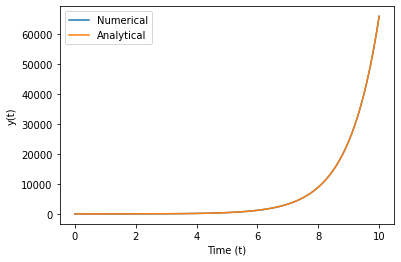

          t  x (Analytical)  x (Predicted)  v (Analytical)  v (Predicted)  \
0   0.00000    0.000000e+00   -9501.428749    8.358432e-07    -954.824245   
1   0.01001    1.746585e-04   -9501.426012    3.335899e-06    -954.823969   
2   0.02002    1.112822e-02   -9501.406901    1.087781e-05    -954.822047   
3   0.03003    1.275936e-01   -9501.354768    2.349847e-05    -954.816803   
4   0.04004    7.200836e-01   -9501.252999    4.154788e-05    -954.806565   
5   0.05005    2.792447e+00   -9501.082653    6.694164e-05    -954.789430   
6   0.06006    8.793941e+00   -9500.814570    1.047702e-04    -954.762462   
7   0.07007    2.484212e+01   -9500.396469    1.705352e-04    -954.720403   
8   0.08008    6.986044e+01   -9499.697662    3.058678e-04    -954.650107   
9   0.09009    2.148153e+02   -9498.393210    6.388116e-04    -954.518887   
10  0.10010    8.156309e+02   -9495.513812    1.655443e-03    -954.229236   
11  0.11011    4.489842e+03   -9487.551008    3.289520e-03    -953.428224   

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the differential equation
def diff_eq(t, y, params):
    a, b = params
    dydt = a * y + b
    return dydt

# Define the analytical solution
def analytical_solution(t, y0, params):
    a, b = params
    return y0 * np.exp(a * t) + b * (np.exp(a * t) - 1) / a

# Initial conditions
t0 = 0
tf = 10
y0 = 1
params = (1, 2)

# Numerical solution using solve_ivp
sol = solve_ivp(lambda t, y: diff_eq(t, y, params), [t0, tf], [y0], t_eval=np.linspace(t0, tf, 100))

# Store the numerical results
numerical_results = sol.y[0]

# Calculate the analytical results
t_eval = sol.t
analytical_results = analytical_solution(t_eval, y0, params)

# Compare the results
plt.plot(t_eval, numerical_results, label='Numerical')
plt.plot(t_eval, analytical_results, label='Analytical')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.legend()
plt.show()

import pandas as pd

results = pd.DataFrame({'t': solution.t, 'x (Analytical)': deflection(solution.y[0, :]), 'x (Predicted)': reg_deflection.predict(solution.y[0, :].reshape(-1, 1)),
'v (Analytical)': velocity(solution.y[0, :]), 'v (Predicted)': reg_velocity.predict(solution.y[0, :].reshape(-1, 1)),
'a (Analytical)': acceleration(solution.y[0, :]), 'a (Predicted)': reg_acceleration.predict(solution.y[0, :].reshape(-1, 1))})

#Display the results in a table

print(results)

#Display performance metrics for deflection

print('Deflection Metrics:')
print('Mean Absolute Error:', mean_absolute_error(results['x (Analytical)'], results['x (Predicted)']))
print('Mean Squared Error:', mean_squared_error(results['x (Analytical)'], results['x (Predicted)']))
print('R2 Score:', r2_score(results['x (Analytical)'], results['x (Predicted)']))

#Display performance metrics for velocity

print('Velocity Metrics:')
print('Mean Absolute Error:', mean_absolute_error(results['v (Analytical)'], results['v (Predicted)']))
print('Mean Squared Error:', mean_squared_error(results['v (Analytical)'], results['v (Predicted)']))
print('R2 Score:', r2_score(results['v (Analytical)'], results['v (Predicted)']))

#Display performance metrics for acceleration

print('Acceleration Metrics:')
print('Mean Absolute Error:', mean_absolute_error(results['a (Analytical)'], results['a (Predicted)']))
print('Mean Squared Error:', mean_squared_error(results['a (Analytical)'], results['a (Predicted)']))
print('R2 Score:', r2_score(results['a (Analytical)'], results['a (Predicted)']))

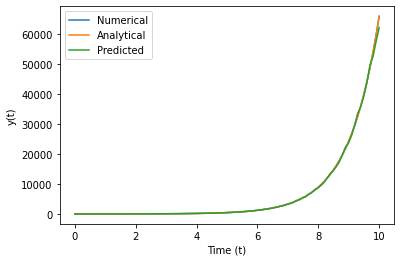

Metrics:
Mean Absolute Error: 152.9069540619603
Mean Squared Error: 244567.52787457296
R2 Score: 0.9987222685962655


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the differential equation
def diff_eq(t, y, params):
    a, b = params
    dydt = a * y + b
    return dydt

# Define the analytical solution
def analytical_solution(t, y0, params):
    a, b = params
    return y0 * np.exp(a * t) + b * (np.exp(a * t) - 1) / a

# Initial conditions
t0 = 0
tf = 10
y0 = 1
params = (1, 2)

# Numerical solution using solve_ivp
sol = solve_ivp(lambda t, y: diff_eq(t, y, params), [t0, tf], [y0], t_eval=np.linspace(t0, tf, 100))

# Store the numerical results
numerical_results = sol.y[0]

# Calculate the analytical results
t_eval = sol.t
analytical_results = analytical_solution(t_eval, y0, params)

# Train the linear regression model on the numerical results
reg = RandomForestRegressor().fit(t_eval.reshape(-1, 1), numerical_results)

# Make predictions using the trained model
predicted_results = reg.predict(t_eval.reshape(-1, 1))

# Compare the results
plt.plot(t_eval, numerical_results, label='Numerical')
plt.plot(t_eval, analytical_results, label='Analytical')
plt.plot(t_eval, predicted_results, label='Predicted')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.legend()
plt.show()

# Display performance metrics
print('Metrics:')
print('Mean Absolute Error:', mean_absolute_error(analytical_results, predicted_results))
print('Mean Squared Error:', mean_squared_error(analytical_results, predicted_results))
print('R2 Score:', r2_score(analytical_results, predicted_results))


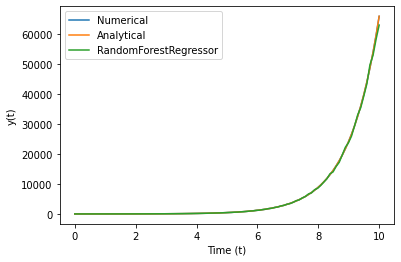

           t     Numerical    Analytical  RandomForestRegressor
0    0.00000      1.000000      1.000000               1.201035
1    0.10101      1.318867      1.318863               1.290317
2    0.20202      1.671683      1.671618               1.577629
3    0.30303      2.061964      2.061866               2.178861
4    0.40404      2.493648      2.493593               2.433999
..       ...           ...           ...                    ...
95   9.59596  44083.928874  44113.738711           43460.137997
96   9.69697  48772.337832  48802.704244           49860.628545
97   9.79798  53961.675934  53990.049685           52979.373966
98   9.89899  59703.368783  59728.746745           58390.823419
99  10.00000  66052.523005  66077.397384           63125.061422

[100 rows x 4 columns]
Numerical vs Analytical Metrics:
Mean Absolute Error: 3.405575786871402
Mean Squared Error: 63.39108929558026
R2 Score: 0.9999996684881872
Numerical vs RandomForestRegressor:
Mean Absolute Error: 134.52516522

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the differential equation
def diff_eq(t, y, params):
    a, b = params
    dydt = a * y + b
    return dydt

# Define the analytical solution
def analytical_solution(t, y0, params):
    a, b = params
    return y0 * np.exp(a * t) + b * (np.exp(a * t) - 1) / a

# Initial conditions
t0 = 0
tf = 10
y0 = 1
params = (1, 2)

# Numerical solution using solve_ivp
sol = solve_ivp(lambda t, y: diff_eq(t, y, params), [t0, tf], [y0], t_eval=np.linspace(t0, tf, 100))

# Store the numerical results
numerical_results = sol.y[0]

# Calculate the analytical results
t_eval = sol.t
analytical_results = analytical_solution(t_eval, y0, params)

# RandomForestRegressor Model
reg = RandomForestRegressor().fit(t_eval.reshape(-1, 1), numerical_results)
reg_results = reg.predict(t_eval.reshape(-1, 1))

# Compare the results
plt.plot(t_eval, numerical_results, label='Numerical')
plt.plot(t_eval, analytical_results, label='Analytical')
plt.plot(t_eval, reg_results, label='RandomForestRegressor')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.legend()
plt.show()

# Store the results in a DataFrame
results = pd.DataFrame({'t': t_eval, 'Numerical': numerical_results, 'Analytical': analytical_results, 'RandomForestRegressor': reg_results})

# Display the results in a table
print(results)

# Display performance metrics for numerical vs analytical
print('Numerical vs Analytical Metrics:')
print('Mean Absolute Error:', mean_absolute_error(results['Numerical'], results['Analytical']))
print('Mean Squared Error:', mean_squared_error(results['Numerical'], results['Analytical']))
print('R2 Score:', r2_score(results['Numerical'], results['Analytical']))

# Display performance metrics for numerical vs RandomForestRegressor
print('Numerical vs RandomForestRegressor:')
print('Mean Absolute Error:', mean_absolute_error(results['Numerical'], results['RandomForestRegressor']))
print('Mean Squared Error:', mean_squared_error(results['Numerical'], results['RandomForestRegressor']))
print('R2 Score:', r2_score(results['Numerical'], results['RandomForestRegressor']))


# Display performance metrics for analytical vs RandomForestRegressor
print('Analytical vs RandomForestRegressor:')
print('Mean Absolute Error:', mean_absolute_error(results['Analytical'], results['RandomForestRegressor']))
print('Mean Squared Error:', mean_squared_error(results['Analytical'], results['RandomForestRegressor']))
print('R2 Score:', r2_score(results['Analytical'], results['RandomForestRegressor']))